<a href="https://colab.research.google.com/github/drshahizan/Python-big-data/blob/main/Project/High%20Five/ProjectHPDP_GroupHighFive.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Airline Delay and Cancellation Dataset 2015 - 2016 ✈**



<br>
The "Airline Delay and Cancellation Data 2015-2016" found on Kaggle is an 
extensive collection of data that showcases the performance of different airlines for the two-year span of 2015 to 2016. This dataset is quite comprehensive, as it comprises of information about the delays, cancellations, and a range of other performance metrics of various airlines. The details included in this database are the airline carrier, flight number, departure and arrival airports, departure and arrival times, as well as information about the delays and cancellations experienced.
<br>

The objective of this study is multifaceted and comprises of the following points:
<br>

1. A comparison of the efficiency of three libraries
2. An analysis of the data and its visualization
3. An attempt to answer five significant questions related to the data through careful examination.

**Group Members:**

<br>
<table width = 700>
  <tr>
    <th>Name</th>
    <th>Matric</th>
  </tr>
  <tr>
    <th>AHMAD MUHAIMIN BIN AHMAD HAMBALI</th>
    <th>A20EC0006</th>
  </tr>
  <tr>
    <th>NAYLI NABIHAH BINTI JASNI</th>
    <th>A20EC0105</th>
  </tr>
    <tr>
    <th>SAKINAH AL’IZZAH BINTI MOHD ASRI</th>
    <th>A20EC0142</th>
  </tr>
    <tr>
    <th>LEE JIA XIAN</th>
    <th>A20EC0200</th>
  </tr>
</table> 

<br>




### **Download and install each library**

##### **Koalas installation**

In [ ]:
!pip install koalas
!pip install pyspark

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 390.8/390.8 KB 7.9 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 281.4/281.4 MB 4.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 199.7/199.7 KB 18.2 MB/s eta 0:00:00
  Created wheel for pyspark: filename=pyspark-3.3.1-py2.py3-none-any.whl size=281845512 sha256=c110b7a995ebc9483d46e841851826c7c1f1fd6cb24b50392eb7e5130c9d626b
  Stored in directory: /root/.cache/pip/wheels/43/dc/11/ec201cd671da62fa9c5cc77078235e40722170ceba231d7598
Successfully built pyspark


##### **Modin installation**

In [ ]:
!pip install modin[all] 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 970.3/970.3 KB 13.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.2/12.2 MB 66.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 132.7/132.7 KB 16.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 68.9/68.9 KB 6.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 83.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.4/57.4 MB 14.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 102.6/102.6 KB 11.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.7/126.7 KB 13.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 439.1/439.1 KB 42.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.8/8.8 MB 79.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.1/57.1 KB 6.8 MB/s eta 0:00:00
     ━━━━━━━━━━━

### **Import all used libraries**

In [ ]:
import pandas as pd
import random
from sklearn.linear_model import LogisticRegression
import numpy as np

**Koalas**

In [ ]:
import databricks.koalas as ks
import pyspark.pandas as ps

**Modin**

In [ ]:
import modin.pandas as md

# **Import Dataset**

This code downloads a csv file named "airline1516.csv" from Google Drive to a local environment. It uses PyDrive, GoogleAuth and oauth2client packages and authenticates the user to access Google Drive. The file link and ID are extracted, and the file is then downloaded using CreateFile() and GetContentFile() methods.

### **Access the dataset saved in google drive**

In [ ]:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)
link = 'https://drive.google.com/file/d/1MerhI69Lsmynn-HYUthGIoqKzx5wDXNN/view?usp=sharing'
# to get the id part of the file
id = link.split("/")[-2]

downloaded = drive.CreateFile({'id':id})
downloaded.GetContentFile('airline1516.csv')

### **Reading file**

This code reads a CSV file 'airline1516.csv' into a DataFrame for further data analysis.

**Pandas**

In [ ]:
%%time
df =pd.read_csv('airline1516.csv')
df

/usr/local/lib/python3.8/dist-packages/IPython/core/magics/execution.py:1310: DtypeWarning: Columns (17) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code, glob, local_ns)


CPU times: user 40.4 s, sys: 7.43 s, total: 47.9 s
Wall time: 54.2 s


,Unnamed: 0,FL_DATE,OP_CARRIER,OP_CARRIER_FL_NUM,ORIGIN,DEST,CRS_DEP_TIME,DEP_TIME,DEP_DELAY,TAXI_OUT,...,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,AIR_TIME,DISTANCE,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY,Unnamed: 27
0,0,2015-01-01,NK,195,MCO,FLL,2147,2143.0,-4.0,15.0,...,63.0,62.0,40.0,177.0,NaN,NaN,NaN,NaN,NaN,NaN
1,1,2015-01-01,NK,197,LGA,FLL,1050,1104.0,14.0,20.0,...,194.0,179.0,150.0,1076.0,NaN,NaN,NaN,NaN,NaN,NaN
2,2,2015-01-01,NK,198,FLL,MCO,700,712.0,12.0,19.0,...,57.0,61.0,32.0,177.0,0.0,0.0,16.0,0.0,0.0,NaN
3,3,2015-01-01,NK,199,IAH,LAS,2240,2251.0,11.0,8.0,...,196.0,176.0,164.0,1222.0,NaN,NaN,NaN,NaN,NaN,NaN
4,4,2015-01-01,NK,200,IAH,ORD,623,620.0,-3.0,15.0,...,152.0,140.0,115.0,925.0,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11436732,5617653,2016-12-31,NK,112,IAH,BWI,615,613.0,-2.0,12.0,...,170.0,167.0,144.0,1235.0,NaN,NaN,NaN,NaN,NaN,NaN
11436733,5617654,2016-12-31,NK,113,BWI,IAH,2108,2229.0,81.0,9.0,...,214.0,200.0,182.0,1235.0,0.0,0.0,0.0,0.0,67.0,NaN
11436734,5617655,2016-12-31,NK,121,ORD,RSW,700,704.0,4.0,11.0,...,172.0,151.0,136.0,1120.0,NaN,NaN,NaN,NaN,NaN,NaN
11436735,5617656,2016-12-31,NK,124,RSW,ORD,1704,1711.0,7.0,9.0,...,183.0,170.0,154.0,1120.0,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
%%time
df.head()

CPU times: user 198 µs, sys: 0 ns, total: 198 µs
Wall time: 203 µs


,Unnamed: 0,FL_DATE,OP_CARRIER,OP_CARRIER_FL_NUM,ORIGIN,DEST,CRS_DEP_TIME,DEP_TIME,DEP_DELAY,TAXI_OUT,...,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,AIR_TIME,DISTANCE,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY,Unnamed: 27
0,0,2015-01-01,NK,195,MCO,FLL,2147,2143.0,-4.0,15.0,...,63.0,62.0,40.0,177.0,NaN,NaN,NaN,NaN,NaN,NaN
1,1,2015-01-01,NK,197,LGA,FLL,1050,1104.0,14.0,20.0,...,194.0,179.0,150.0,1076.0,NaN,NaN,NaN,NaN,NaN,NaN
2,2,2015-01-01,NK,198,FLL,MCO,700,712.0,12.0,19.0,...,57.0,61.0,32.0,177.0,0.0,0.0,16.0,0.0,0.0,NaN
3,3,2015-01-01,NK,199,IAH,LAS,2240,2251.0,11.0,8.0,...,196.0,176.0,164.0,1222.0,NaN,NaN,NaN,NaN,NaN,NaN
4,4,2015-01-01,NK,200,IAH,ORD,623,620.0,-3.0,15.0,...,152.0,140.0,115.0,925.0,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
%%time
df.tail()

CPU times: user 210 µs, sys: 30 µs, total: 240 µs
Wall time: 247 µs


,Unnamed: 0,FL_DATE,OP_CARRIER,OP_CARRIER_FL_NUM,ORIGIN,DEST,CRS_DEP_TIME,DEP_TIME,DEP_DELAY,TAXI_OUT,...,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,AIR_TIME,DISTANCE,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY,Unnamed: 27
11436732,5617653,2016-12-31,NK,112,IAH,BWI,615,613.0,-2.0,12.0,...,170.0,167.0,144.0,1235.0,NaN,NaN,NaN,NaN,NaN,NaN
11436733,5617654,2016-12-31,NK,113,BWI,IAH,2108,2229.0,81.0,9.0,...,214.0,200.0,182.0,1235.0,0.0,0.0,0.0,0.0,67.0,NaN
11436734,5617655,2016-12-31,NK,121,ORD,RSW,700,704.0,4.0,11.0,...,172.0,151.0,136.0,1120.0,NaN,NaN,NaN,NaN,NaN,NaN
11436735,5617656,2016-12-31,NK,124,RSW,ORD,1704,1711.0,7.0,9.0,...,183.0,170.0,154.0,1120.0,NaN,NaN,NaN,NaN,NaN,NaN
11436736,5617657,2016-12-31,NK,126,FLL,MYR,2015,2208.0,113.0,21.0,...,98.0,102.0,75.0,529.0,113.0,0.0,4.0,0.0,0.0,NaN


**Koalas**

In [ ]:
%%time
kdf = ks.read_csv('airline1516.csv')

CPU times: user 582 ms, sys: 139 ms, total: 721 ms
Wall time: 1min 32s


In [ ]:
%%time
kdf.head()

CPU times: user 44.4 ms, sys: 6.94 ms, total: 51.3 ms
Wall time: 368 ms


,_c0,FL_DATE,OP_CARRIER,OP_CARRIER_FL_NUM,ORIGIN,DEST,CRS_DEP_TIME,DEP_TIME,DEP_DELAY,TAXI_OUT,WHEELS_OFF,WHEELS_ON,TAXI_IN,CRS_ARR_TIME,ARR_TIME,ARR_DELAY,CANCELLED,CANCELLATION_CODE,DIVERTED,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,AIR_TIME,DISTANCE,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY,Unnamed: 27
0,0,2015-01-01,NK,195,MCO,FLL,2147,2143.0,-4.0,15.0,2158.0,2238.0,7.0,2250,2245.0,-5.0,0.0,None,0.0,63.0,62.0,40.0,177.0,NaN,NaN,NaN,NaN,NaN,None
1,1,2015-01-01,NK,197,LGA,FLL,1050,1104.0,14.0,20.0,1124.0,1354.0,9.0,1404,1403.0,-1.0,0.0,None,0.0,194.0,179.0,150.0,1076.0,NaN,NaN,NaN,NaN,NaN,None
2,2,2015-01-01,NK,198,FLL,MCO,700,712.0,12.0,19.0,731.0,803.0,10.0,757,813.0,16.0,0.0,None,0.0,57.0,61.0,32.0,177.0,0.0,0.0,16.0,0.0,0.0,None
3,3,2015-01-01,NK,199,IAH,LAS,2240,2251.0,11.0,8.0,2259.0,2343.0,4.0,2356,2347.0,-9.0,0.0,None,0.0,196.0,176.0,164.0,1222.0,NaN,NaN,NaN,NaN,NaN,None
4,4,2015-01-01,NK,200,IAH,ORD,623,620.0,-3.0,15.0,635.0,830.0,10.0,855,840.0,-15.0,0.0,None,0.0,152.0,140.0,115.0,925.0,NaN,NaN,NaN,NaN,NaN,None


In [ ]:
%%time
kdf.tail()

CPU times: user 767 ms, sys: 71.2 ms, total: 838 ms
Wall time: 2min 15s


,_c0,FL_DATE,OP_CARRIER,OP_CARRIER_FL_NUM,ORIGIN,DEST,CRS_DEP_TIME,DEP_TIME,DEP_DELAY,TAXI_OUT,WHEELS_OFF,WHEELS_ON,TAXI_IN,CRS_ARR_TIME,ARR_TIME,ARR_DELAY,CANCELLED,CANCELLATION_CODE,DIVERTED,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,AIR_TIME,DISTANCE,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY,Unnamed: 27
11436732,5617653,2016-12-31,NK,112,IAH,BWI,615,613.0,-2.0,12.0,625.0,949.0,11.0,1005,1000.0,-5.0,0.0,None,0.0,170.0,167.0,144.0,1235.0,NaN,NaN,NaN,NaN,NaN,None
11436733,5617654,2016-12-31,NK,113,BWI,IAH,2108,2229.0,81.0,9.0,2238.0,40.0,9.0,2342,49.0,67.0,0.0,None,0.0,214.0,200.0,182.0,1235.0,0.0,0.0,0.0,0.0,67.0,None
11436734,5617655,2016-12-31,NK,121,ORD,RSW,700,704.0,4.0,11.0,715.0,1031.0,4.0,1052,1035.0,-17.0,0.0,None,0.0,172.0,151.0,136.0,1120.0,NaN,NaN,NaN,NaN,NaN,None
11436735,5617656,2016-12-31,NK,124,RSW,ORD,1704,1711.0,7.0,9.0,1720.0,1854.0,7.0,1907,1901.0,-6.0,0.0,None,0.0,183.0,170.0,154.0,1120.0,NaN,NaN,NaN,NaN,NaN,None
11436736,5617657,2016-12-31,NK,126,FLL,MYR,2015,2208.0,113.0,21.0,2229.0,2344.0,6.0,2153,2350.0,117.0,0.0,None,0.0,98.0,102.0,75.0,529.0,113.0,0.0,4.0,0.0,0.0,None


**Modin**

In [ ]:
%%time
mdf = md.read_csv('airline1516.csv')
mdf

(raylet) Spilled 9259 MiB, 176 objects, write throughput 225 MiB/s.


CPU times: user 2.18 s, sys: 842 ms, total: 3.02 s
Wall time: 1min 12s


(raylet) [2023-01-28 21:18:32,183 E 4945 4945] (raylet) node_manager.cc:3097: 5 Workers (tasks / actors) killed due to memory pressure (OOM), 0 Workers crashed due to other reasons at node (ID: 936a5be0d289402570056d6d94efc5d2b8a300023a9c291b75cc3192, IP: 172.28.0.12) over the last time period. To see more information about the Workers killed on this node, use `ray logs raylet.out -ip 172.28.0.12`
(raylet) 
(raylet) Refer to the documentation on how to address the out of memory issue: https://docs.ray.io/en/latest/ray-core/scheduling/ray-oom-prevention.html. Consider provisioning more memory on this node or reducing task parallelism by requesting more CPUs per task. To adjust the kill threshold, set the environment variable `RAY_memory_usage_threshold` when starting Ray. To disable worker killing, set the environment variable `RAY_memory_monitor_refresh_ms` to zero.


,Unnamed: 0,FL_DATE,OP_CARRIER,OP_CARRIER_FL_NUM,ORIGIN,DEST,CRS_DEP_TIME,DEP_TIME,DEP_DELAY,TAXI_OUT,...,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,AIR_TIME,DISTANCE,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY,Unnamed: 27
0,0,2015-01-01,NK,195,MCO,FLL,2147,2143.0,-4.0,15.0,...,63.0,62.0,40.0,177.0,NaN,NaN,NaN,NaN,NaN,NaN
1,1,2015-01-01,NK,197,LGA,FLL,1050,1104.0,14.0,20.0,...,194.0,179.0,150.0,1076.0,NaN,NaN,NaN,NaN,NaN,NaN
2,2,2015-01-01,NK,198,FLL,MCO,700,712.0,12.0,19.0,...,57.0,61.0,32.0,177.0,0.0,0.0,16.0,0.0,0.0,NaN
3,3,2015-01-01,NK,199,IAH,LAS,2240,2251.0,11.0,8.0,...,196.0,176.0,164.0,1222.0,NaN,NaN,NaN,NaN,NaN,NaN
4,4,2015-01-01,NK,200,IAH,ORD,623,620.0,-3.0,15.0,...,152.0,140.0,115.0,925.0,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11436732,5617653,2016-12-31,NK,112,IAH,BWI,615,613.0,-2.0,12.0,...,170.0,167.0,144.0,1235.0,NaN,NaN,NaN,NaN,NaN,NaN
11436733,5617654,2016-12-31,NK,113,BWI,IAH,2108,2229.0,81.0,9.0,...,214.0,200.0,182.0,1235.0,0.0,0.0,0.0,0.0,67.0,NaN
11436734,5617655,2016-12-31,NK,121,ORD,RSW,700,704.0,4.0,11.0,...,172.0,151.0,136.0,1120.0,NaN,NaN,NaN,NaN,NaN,NaN
11436735,5617656,2016-12-31,NK,124,RSW,ORD,1704,1711.0,7.0,9.0,...,183.0,170.0,154.0,1120.0,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
%%time
mdf.head()

CPU times: user 803 µs, sys: 21 µs, total: 824 µs
Wall time: 838 µs


,Unnamed: 0,FL_DATE,OP_CARRIER,OP_CARRIER_FL_NUM,ORIGIN,DEST,CRS_DEP_TIME,DEP_TIME,DEP_DELAY,TAXI_OUT,...,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,AIR_TIME,DISTANCE,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY,Unnamed: 27
0,0,2015-01-01,NK,195,MCO,FLL,2147,2143.0,-4.0,15.0,...,63.0,62.0,40.0,177.0,NaN,NaN,NaN,NaN,NaN,NaN
1,1,2015-01-01,NK,197,LGA,FLL,1050,1104.0,14.0,20.0,...,194.0,179.0,150.0,1076.0,NaN,NaN,NaN,NaN,NaN,NaN
2,2,2015-01-01,NK,198,FLL,MCO,700,712.0,12.0,19.0,...,57.0,61.0,32.0,177.0,0.0,0.0,16.0,0.0,0.0,NaN
3,3,2015-01-01,NK,199,IAH,LAS,2240,2251.0,11.0,8.0,...,196.0,176.0,164.0,1222.0,NaN,NaN,NaN,NaN,NaN,NaN
4,4,2015-01-01,NK,200,IAH,ORD,623,620.0,-3.0,15.0,...,152.0,140.0,115.0,925.0,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
%%time
mdf.tail()

CPU times: user 1.02 ms, sys: 92 µs, total: 1.12 ms
Wall time: 1.14 ms


,Unnamed: 0,FL_DATE,OP_CARRIER,OP_CARRIER_FL_NUM,ORIGIN,DEST,CRS_DEP_TIME,DEP_TIME,DEP_DELAY,TAXI_OUT,...,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,AIR_TIME,DISTANCE,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY,Unnamed: 27
11436732,5617653,2016-12-31,NK,112,IAH,BWI,615,613.0,-2.0,12.0,...,170.0,167.0,144.0,1235.0,NaN,NaN,NaN,NaN,NaN,NaN
11436733,5617654,2016-12-31,NK,113,BWI,IAH,2108,2229.0,81.0,9.0,...,214.0,200.0,182.0,1235.0,0.0,0.0,0.0,0.0,67.0,NaN
11436734,5617655,2016-12-31,NK,121,ORD,RSW,700,704.0,4.0,11.0,...,172.0,151.0,136.0,1120.0,NaN,NaN,NaN,NaN,NaN,NaN
11436735,5617656,2016-12-31,NK,124,RSW,ORD,1704,1711.0,7.0,9.0,...,183.0,170.0,154.0,1120.0,NaN,NaN,NaN,NaN,NaN,NaN
11436736,5617657,2016-12-31,NK,126,FLL,MYR,2015,2208.0,113.0,21.0,...,98.0,102.0,75.0,529.0,113.0,0.0,4.0,0.0,0.0,NaN


# **Data Cleaning and Preparation**

### **Dropping Columns** 

This code uses the Pandas, Koalas and Modin library to drop several columns ("CANCELLATION_CODE", "CARRIER_DELAY", "WEATHER_DELAY", "NAS_DELAY", "SECURITY_DELAY", "LATE_AIRCRAFT_DELAY", "Unnamed: 27") from the DataFrame using the 'drop' method. The 'axis' parameter is set to 1, indicating that the columns should be dropped along the horizontal axis.

**Pandas**

In [ ]:
%%time
df = df.drop(["CANCELLATION_CODE", "CARRIER_DELAY", "WEATHER_DELAY", "NAS_DELAY", "SECURITY_DELAY", "LATE_AIRCRAFT_DELAY", "Unnamed: 27"], axis=1)

CPU times: user 796 ms, sys: 1.79 ms, total: 798 ms
Wall time: 809 ms


**Koalas**

In [ ]:
%%time
kdf = kdf.drop(["CANCELLATION_CODE", "CARRIER_DELAY", "WEATHER_DELAY", "NAS_DELAY", "SECURITY_DELAY", "LATE_AIRCRAFT_DELAY", "Unnamed: 27"], axis=1)

CPU times: user 28.3 ms, sys: 928 µs, total: 29.3 ms
Wall time: 117 ms


**Modin**

In [ ]:
%%time
mdf = mdf.drop(["CANCELLATION_CODE", "CARRIER_DELAY", "WEATHER_DELAY", "NAS_DELAY", "SECURITY_DELAY", "LATE_AIRCRAFT_DELAY", "Unnamed: 27"], axis=1)

CPU times: user 3.87 ms, sys: 296 µs, total: 4.16 ms
Wall time: 8.19 ms


In [ ]:
row, col = mdf.shape
print('number of rows:',row)

print('number of column:',col)

number of rows: 11436737
number of column: 22


### **Checking and Dropping Null Value**

Perform two operations on the DataFrame . The first operation removes all the rows with missing values ('NaN') from the DataFrame in place. The second operation calculates the sum of missing values ('NaN') for each column in the DataFrame and returns the result. These operations allow for a more thorough analysis of the data by removing rows with missing values and providing insight into the distribution of missing data in the DataFrame.

**Pandas**

In [ ]:
df.isna().sum()

Unnamed: 0                    0
FL_DATE                       0
OP_CARRIER                    0
OP_CARRIER_FL_NUM             0
ORIGIN                        0
DEST                          0
CRS_DEP_TIME                  0
DEP_TIME                 149609
DEP_DELAY                149609
TAXI_OUT                 154465
WHEELS_OFF               154465
WHEELS_ON                160357
TAXI_IN                  160357
CRS_ARR_TIME                  0
ARR_TIME                 160357
ARR_DELAY                184584
CANCELLED                     0
CANCELLATION_CODE      11280992
DIVERTED                      0
CRS_ELAPSED_TIME             12
ACTUAL_ELAPSED_TIME      184584
AIR_TIME                 184584
DISTANCE                      0
CARRIER_DELAY           9409059
WEATHER_DELAY           9409059
NAS_DELAY               9409059
SECURITY_DELAY          9409059
LATE_AIRCRAFT_DELAY     9409059
Unnamed: 27            11436737
dtype: int64

In [ ]:
%%time
df.dropna(inplace = True)
df.isna().sum()

CPU times: user 6.77 s, sys: 270 ms, total: 7.04 s
Wall time: 7.02 s


Unnamed: 0             0
FL_DATE                0
OP_CARRIER             0
OP_CARRIER_FL_NUM      0
ORIGIN                 0
DEST                   0
CRS_DEP_TIME           0
DEP_TIME               0
DEP_DELAY              0
TAXI_OUT               0
WHEELS_OFF             0
WHEELS_ON              0
TAXI_IN                0
CRS_ARR_TIME           0
ARR_TIME               0
ARR_DELAY              0
CANCELLED              0
DIVERTED               0
CRS_ELAPSED_TIME       0
ACTUAL_ELAPSED_TIME    0
AIR_TIME               0
DISTANCE               0
dtype: int64

**Koalas**

In [ ]:
kdf.isna().sum()

_c0                         0
FL_DATE                     0
OP_CARRIER                  0
OP_CARRIER_FL_NUM           0
ORIGIN                      0
DEST                        0
CRS_DEP_TIME                0
DEP_TIME               149609
DEP_DELAY              149609
TAXI_OUT               154465
WHEELS_OFF             154465
WHEELS_ON              160357
TAXI_IN                160357
CRS_ARR_TIME                0
ARR_TIME               160357
ARR_DELAY              184584
CANCELLED                   0
DIVERTED                    0
CRS_ELAPSED_TIME           12
ACTUAL_ELAPSED_TIME    184584
AIR_TIME               184584
DISTANCE                    0
dtype: int64

In [ ]:
%%time
kdf.dropna(inplace = True)
kdf.isna().sum()

CPU times: user 1.03 s, sys: 141 ms, total: 1.17 s
Wall time: 1min 10s


_c0                    0
FL_DATE                0
OP_CARRIER             0
OP_CARRIER_FL_NUM      0
ORIGIN                 0
DEST                   0
CRS_DEP_TIME           0
DEP_TIME               0
DEP_DELAY              0
TAXI_OUT               0
WHEELS_OFF             0
WHEELS_ON              0
TAXI_IN                0
CRS_ARR_TIME           0
ARR_TIME               0
ARR_DELAY              0
CANCELLED              0
DIVERTED               0
CRS_ELAPSED_TIME       0
ACTUAL_ELAPSED_TIME    0
AIR_TIME               0
DISTANCE               0
dtype: int64

**Modin**

In [ ]:
%%time
mdf.isna().sum()

CPU times: user 23.4 ms, sys: 4.28 ms, total: 27.7 ms
Wall time: 26.8 ms


Unnamed: 0                  0
FL_DATE                     0
OP_CARRIER                  0
OP_CARRIER_FL_NUM           0
ORIGIN                      0
DEST                        0
CRS_DEP_TIME                0
DEP_TIME               149609
DEP_DELAY              149609
TAXI_OUT               154465
WHEELS_OFF             154465
WHEELS_ON              160357
TAXI_IN                160357
CRS_ARR_TIME                0
ARR_TIME               160357
ARR_DELAY              184584
CANCELLED                   0
DIVERTED                    0
CRS_ELAPSED_TIME           12
ACTUAL_ELAPSED_TIME    184584
AIR_TIME               184584
DISTANCE                    0
dtype: int64

In [ ]:
%%time
mdf.dropna(inplace = True)
mdf.isna().sum()

CPU times: user 511 ms, sys: 147 ms, total: 658 ms
Wall time: 26.5 s


Unnamed: 0             0
FL_DATE                0
OP_CARRIER             0
OP_CARRIER_FL_NUM      0
ORIGIN                 0
DEST                   0
CRS_DEP_TIME           0
DEP_TIME               0
DEP_DELAY              0
TAXI_OUT               0
WHEELS_OFF             0
WHEELS_ON              0
TAXI_IN                0
CRS_ARR_TIME           0
ARR_TIME               0
ARR_DELAY              0
CANCELLED              0
DIVERTED               0
CRS_ELAPSED_TIME       0
ACTUAL_ELAPSED_TIME    0
AIR_TIME               0
DISTANCE               0
dtype: int64

## **Manipulating columns value**

Perform data cleaning on the DataFrame. The 'df['OP_CARRIER']' accesses a specific column of the DataFrame and the '.replace' method replaces the abbreviated airline codes with their full names.Returns the entire DataFrame with the cleaned values in the 'OP_CARRIER' column.

**Pandas**

In [ ]:
%%time
df['OP_CARRIER'].replace({
    'UA':'United Airlines',
    'AS':'Alaska Airlines',
    '9E':'Endeavor Air',
    'B6':'JetBlue Airways',
    'EV':'ExpressJet',
    'F9':'Frontier Airlines',
    'G4':'Allegiant Air',
    'HA':'Hawaiian Airlines',
    'MQ':'Envoy Air',
    'NK':'Spirit Airlines',
    'OH':'PSA Airlines',
    'OO':'SkyWest Airlines',
    'VX':'Virgin America',
    'WN':'Southwest Airlines',
    'YV':'Mesa Airline',
    'YX':'Republic Airways',
    'AA':'American Airlines',
    'DL':'Delta Airlines'
},inplace=True)
df

CPU times: user 6.71 s, sys: 248 ms, total: 6.96 s
Wall time: 6.9 s


,Unnamed: 0,FL_DATE,OP_CARRIER,OP_CARRIER_FL_NUM,ORIGIN,DEST,CRS_DEP_TIME,DEP_TIME,DEP_DELAY,TAXI_OUT,...,TAXI_IN,CRS_ARR_TIME,ARR_TIME,ARR_DELAY,CANCELLED,DIVERTED,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,AIR_TIME,DISTANCE
0,0,2015-01-01,Spirit Airlines,195,MCO,FLL,2147,2143.0,-4.0,15.0,...,7.0,2250,2245.0,-5.0,0.0,0.0,63.0,62.0,40.0,177.0
1,1,2015-01-01,Spirit Airlines,197,LGA,FLL,1050,1104.0,14.0,20.0,...,9.0,1404,1403.0,-1.0,0.0,0.0,194.0,179.0,150.0,1076.0
2,2,2015-01-01,Spirit Airlines,198,FLL,MCO,700,712.0,12.0,19.0,...,10.0,757,813.0,16.0,0.0,0.0,57.0,61.0,32.0,177.0
3,3,2015-01-01,Spirit Airlines,199,IAH,LAS,2240,2251.0,11.0,8.0,...,4.0,2356,2347.0,-9.0,0.0,0.0,196.0,176.0,164.0,1222.0
4,4,2015-01-01,Spirit Airlines,200,IAH,ORD,623,620.0,-3.0,15.0,...,10.0,855,840.0,-15.0,0.0,0.0,152.0,140.0,115.0,925.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11436732,5617653,2016-12-31,Spirit Airlines,112,IAH,BWI,615,613.0,-2.0,12.0,...,11.0,1005,1000.0,-5.0,0.0,0.0,170.0,167.0,144.0,1235.0
11436733,5617654,2016-12-31,Spirit Airlines,113,BWI,IAH,2108,2229.0,81.0,9.0,...,9.0,2342,49.0,67.0,0.0,0.0,214.0,200.0,182.0,1235.0
11436734,5617655,2016-12-31,Spirit Airlines,121,ORD,RSW,700,704.0,4.0,11.0,...,4.0,1052,1035.0,-17.0,0.0,0.0,172.0,151.0,136.0,1120.0
11436735,5617656,2016-12-31,Spirit Airlines,124,RSW,ORD,1704,1711.0,7.0,9.0,...,7.0,1907,1901.0,-6.0,0.0,0.0,183.0,170.0,154.0,1120.0


**Koalas**

In [ ]:
%%time
kdf['OP_CARRIER'] = kdf['OP_CARRIER'].replace({'UA':'United Airlines','AS':'Alaska Airlines','9E':'Endeavor Air','B6':'JetBlue Airways','EV':'ExpressJet','F9':'Frontier Airlines','G4':'Allegiant Air','HA':'Hawaiian Airlines','MQ':'Envoy Air','NK':'Spirit Airlines','OH':'PSA Airlines','OO':'SkyWest Airlines','VX':'Virgin America','WN':'Southwest Airlines','YV':'Mesa Airline','YX':'Republic Airways','AA':'American Airlines','DL':'Delta Airlines'})
kdf.head(10)

CPU times: user 346 ms, sys: 30.9 ms, total: 377 ms
Wall time: 2.21 s


,_c0,FL_DATE,OP_CARRIER,OP_CARRIER_FL_NUM,ORIGIN,DEST,CRS_DEP_TIME,DEP_TIME,DEP_DELAY,TAXI_OUT,WHEELS_OFF,WHEELS_ON,TAXI_IN,CRS_ARR_TIME,ARR_TIME,ARR_DELAY,CANCELLED,DIVERTED,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,AIR_TIME,DISTANCE
0,0,2015-01-01,Spirit Airlines,195,MCO,FLL,2147,2143.0,-4.0,15.0,2158.0,2238.0,7.0,2250,2245.0,-5.0,0.0,0.0,63.0,62.0,40.0,177.0
1,1,2015-01-01,Spirit Airlines,197,LGA,FLL,1050,1104.0,14.0,20.0,1124.0,1354.0,9.0,1404,1403.0,-1.0,0.0,0.0,194.0,179.0,150.0,1076.0
2,2,2015-01-01,Spirit Airlines,198,FLL,MCO,700,712.0,12.0,19.0,731.0,803.0,10.0,757,813.0,16.0,0.0,0.0,57.0,61.0,32.0,177.0
3,3,2015-01-01,Spirit Airlines,199,IAH,LAS,2240,2251.0,11.0,8.0,2259.0,2343.0,4.0,2356,2347.0,-9.0,0.0,0.0,196.0,176.0,164.0,1222.0
4,4,2015-01-01,Spirit Airlines,200,IAH,ORD,623,620.0,-3.0,15.0,635.0,830.0,10.0,855,840.0,-15.0,0.0,0.0,152.0,140.0,115.0,925.0
5,5,2015-01-01,Spirit Airlines,201,FLL,STT,1253,1258.0,5.0,24.0,1322.0,1634.0,10.0,1630,1644.0,14.0,0.0,0.0,157.0,166.0,132.0,1107.0
6,6,2015-01-01,Spirit Airlines,202,DFW,BWI,1342,1337.0,-5.0,11.0,1348.0,1700.0,5.0,1724,1705.0,-19.0,0.0,0.0,162.0,148.0,132.0,1217.0
7,7,2015-01-01,Spirit Airlines,203,BOS,PBI,1555,1554.0,-1.0,17.0,1611.0,1903.0,5.0,1913,1908.0,-5.0,0.0,0.0,198.0,194.0,172.0,1197.0
8,8,2015-01-01,Spirit Airlines,204,PBI,BOS,1205,1204.0,-1.0,11.0,1215.0,1455.0,9.0,1505,1504.0,-1.0,0.0,0.0,180.0,180.0,160.0,1197.0
9,9,2015-01-01,Spirit Airlines,209,ORD,OAK,1534,1534.0,0.0,11.0,1545.0,1736.0,6.0,1819,1742.0,-37.0,0.0,0.0,285.0,248.0,231.0,1836.0


**Modin**

In [ ]:
%%time
mdf['OP_CARRIER'].replace({'UA':'United Airlines','AS':'Alaska Airlines','9E':'Endeavor Air','B6':'JetBlue Airways','EV':'ExpressJet','F9':'Frontier Airlines','G4':'Allegiant Air','HA':'Hawaiian Airlines','MQ':'Envoy Air','NK':'Spirit Airlines','OH':'PSA Airlines','OO':'SkyWest Airlines','VX':'Virgin America','WN':'Southwest Airlines','YV':'Mesa Airline','YX':'Republic Airways','AA':'American Airlines','DL':'Delta Airlines'},inplace=True)
mdf

CPU times: user 264 ms, sys: 58.7 ms, total: 322 ms
Wall time: 8.77 s


,Unnamed: 0,FL_DATE,OP_CARRIER,OP_CARRIER_FL_NUM,ORIGIN,DEST,CRS_DEP_TIME,DEP_TIME,DEP_DELAY,TAXI_OUT,...,TAXI_IN,CRS_ARR_TIME,ARR_TIME,ARR_DELAY,CANCELLED,DIVERTED,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,AIR_TIME,DISTANCE
0,0,2015-01-01,Spirit Airlines,195,MCO,FLL,2147,2143.0,-4.0,15.0,...,7.0,2250,2245.0,-5.0,0.0,0.0,63.0,62.0,40.0,177.0
1,1,2015-01-01,Spirit Airlines,197,LGA,FLL,1050,1104.0,14.0,20.0,...,9.0,1404,1403.0,-1.0,0.0,0.0,194.0,179.0,150.0,1076.0
2,2,2015-01-01,Spirit Airlines,198,FLL,MCO,700,712.0,12.0,19.0,...,10.0,757,813.0,16.0,0.0,0.0,57.0,61.0,32.0,177.0
3,3,2015-01-01,Spirit Airlines,199,IAH,LAS,2240,2251.0,11.0,8.0,...,4.0,2356,2347.0,-9.0,0.0,0.0,196.0,176.0,164.0,1222.0
4,4,2015-01-01,Spirit Airlines,200,IAH,ORD,623,620.0,-3.0,15.0,...,10.0,855,840.0,-15.0,0.0,0.0,152.0,140.0,115.0,925.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11436732,5617653,2016-12-31,Spirit Airlines,112,IAH,BWI,615,613.0,-2.0,12.0,...,11.0,1005,1000.0,-5.0,0.0,0.0,170.0,167.0,144.0,1235.0
11436733,5617654,2016-12-31,Spirit Airlines,113,BWI,IAH,2108,2229.0,81.0,9.0,...,9.0,2342,49.0,67.0,0.0,0.0,214.0,200.0,182.0,1235.0
11436734,5617655,2016-12-31,Spirit Airlines,121,ORD,RSW,700,704.0,4.0,11.0,...,4.0,1052,1035.0,-17.0,0.0,0.0,172.0,151.0,136.0,1120.0
11436735,5617656,2016-12-31,Spirit Airlines,124,RSW,ORD,1704,1711.0,7.0,9.0,...,7.0,1907,1901.0,-6.0,0.0,0.0,183.0,170.0,154.0,1120.0


In [ ]:
row, col = df.shape
print('number of rows:',row)

print('number of column:',col)

number of rows: 11252153
number of column: 22


# **Exploratory Analysis and Visualization**  

*   Compute the mean, sum, range and other interesting statistics for numeric columns
*   Explore distributions of numeric columns using histograms etc.
*   Explore relationship between columns using scatter plots, bar charts etc.
*   Make a note of interesting insights from the exploratory analysis


**Graph Formatter Function**

In [ ]:
def reformat_large_tick_values(tick_val, pos):
    """
    Turns large tick values (in the billions, millions and thousands) such as 4500 into 4.5K and also appropriately turns 4000 into 4K (no zero after the decimal).
    """
    if tick_val >= 1000000000:
        val = round(tick_val/1000000000, 1)
        new_tick_format = '{:}B'.format(val)
    elif tick_val >= 1000000:
        val = round(tick_val/1000000, 1)
        new_tick_format = '{:}M'.format(val)
    elif tick_val >= 1000:
        val = round(tick_val/1000, 1)
        new_tick_format = '{:}K'.format(val)
    elif tick_val < 1000:
        new_tick_format = round(tick_val, 1)
    else:
        new_tick_format = tick_val

    # make new_tick_format into a string value
    new_tick_format = str(new_tick_format)
    
    # code below will keep 4.5M as is but change values such as 4.0M to 4M since that zero after the decimal isn't needed
    index_of_decimal = new_tick_format.find(".")
    
    if index_of_decimal != -1:
        value_after_decimal = new_tick_format[index_of_decimal+1]
        if value_after_decimal == "0":
            # remove the 0 after the decimal point since it's not needed
            new_tick_format = new_tick_format[0:index_of_decimal] + new_tick_format[index_of_decimal+2:]
            
    return new_tick_format

#### **Graph 1: Graph of flight Delay Times Distribution**

The histogram depicts the distribution of flight delay time in minutes. The histogram describes the distribution of arrival delay flight time as shifted to the right. When data are right-skewed, or positive-skewed, many of the values are near the lower end of the range, and higher values are infrequent. As a result, the median value of 1.50 is less than the mean value of 3.39, because the mean is more sensitive to higher values and is drawn to the tail of the histogram.

**Pandas**

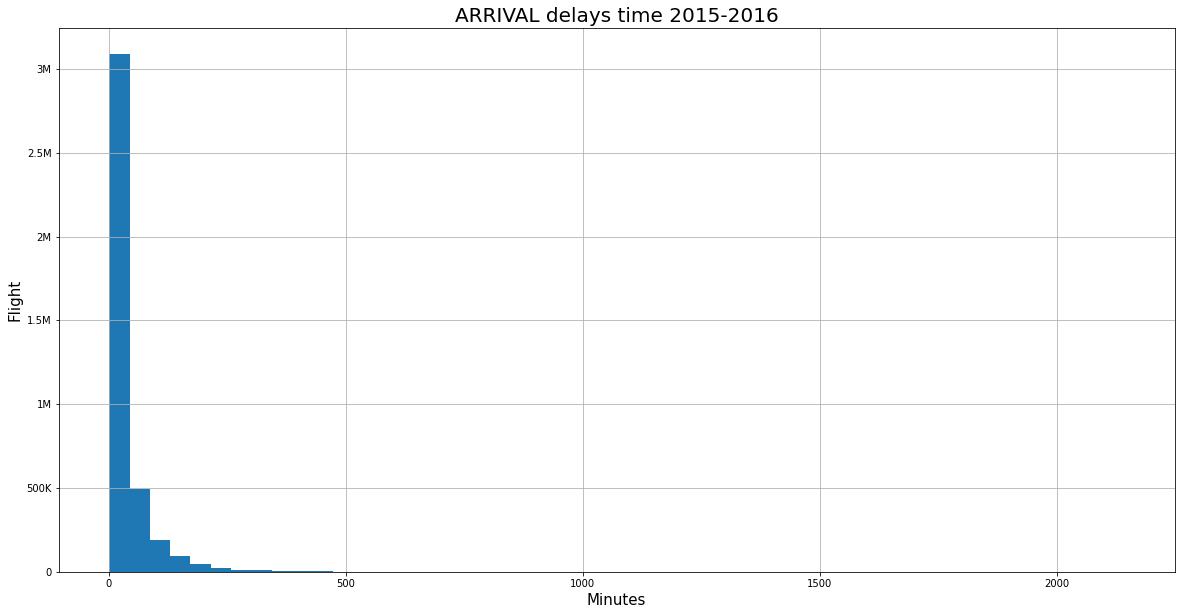

flight delay time median:  15.0


count    3.971681e+06
mean     3.391894e+01
std      5.609328e+01
min      1.000000e+00
25%      6.000000e+00
50%      1.500000e+01
75%      3.800000e+01
max      2.142000e+03
Name: ARR_DELAY, dtype: float64

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.ticker as tick

df_delay = df[df.ARR_DELAY>0]

plt.rcParams['figure.figsize'] = [20, 10]

median_flight_delay_time = df_delay['ARR_DELAY'].median()
max = df_delay['ARR_DELAY'].max()
min = df_delay['ARR_DELAY'].min()



df_delay.hist(column='ARR_DELAY', bins=50)
plt.title('ARRIVAL delays time 2015-2016', fontsize=20)
plt.ylabel('Flight', fontsize=15)
plt.xlabel('Minutes', fontsize=15)
ax = plt.gca()
ax.yaxis.set_major_formatter(tick.FuncFormatter(reformat_large_tick_values));
plt.show()

print("flight delay time median: ",median_flight_delay_time)
df_delay['ARR_DELAY'].describe()


**Koalas**

In [ ]:
import matplotlib.pyplot as plt
from databricks.koalas import DataFrame

kdf_delay = kdf[kdf.ARR_DELAY>0]
kdf_delay.head()

,_c0,FL_DATE,OP_CARRIER,OP_CARRIER_FL_NUM,ORIGIN,DEST,CRS_DEP_TIME,DEP_TIME,DEP_DELAY,TAXI_OUT,WHEELS_OFF,WHEELS_ON,TAXI_IN,CRS_ARR_TIME,ARR_TIME,ARR_DELAY,CANCELLED,DIVERTED,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,AIR_TIME,DISTANCE
2,2,2015-01-01,Spirit Airlines,198,FLL,MCO,700,712.0,12.0,19.0,731.0,803.0,10.0,757,813.0,16.0,0.0,0.0,57.0,61.0,32.0,177.0
5,5,2015-01-01,Spirit Airlines,201,FLL,STT,1253,1258.0,5.0,24.0,1322.0,1634.0,10.0,1630,1644.0,14.0,0.0,0.0,157.0,166.0,132.0,1107.0
12,12,2015-01-01,Spirit Airlines,215,PHL,DFW,2059,2051.0,-8.0,23.0,2114.0,2350.0,6.0,2352,2356.0,4.0,0.0,0.0,233.0,245.0,216.0,1303.0
13,13,2015-01-01,Spirit Airlines,216,LAX,IAH,1648,1641.0,-7.0,27.0,1708.0,2159.0,10.0,2155,2209.0,14.0,0.0,0.0,187.0,208.0,171.0,1379.0
15,15,2015-01-01,Spirit Airlines,218,FLL,ACY,800,815.0,15.0,12.0,827.0,1037.0,6.0,1025,1043.0,18.0,0.0,0.0,145.0,148.0,130.0,977.0


In [ ]:
fig = kdf_delay['ARR_DELAY'].plot.hist(bins=50)
fig.update_layout(
    title='ARRIVAL delays time 2015-2016',
    xaxis_title='Minutes',
    yaxis_title='Flight',
)
fig.show()

**Modin**

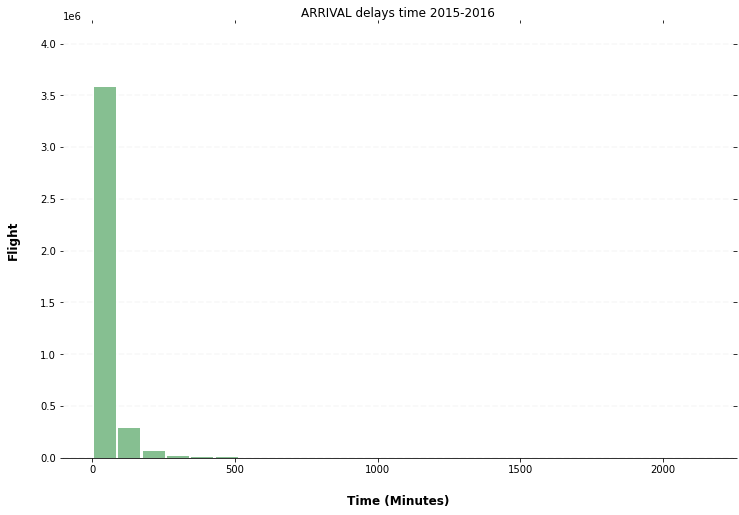

In [ ]:
md_delay = mdf[mdf.ARR_DELAY>0]

ax = md_delay.hist(column='ARR_DELAY', bins=25, grid=False, figsize=(12,8), color='#86bf91', zorder=2, rwidth=0.9)

ax = ax[0]
for x in ax:

    # Despine
    x.spines['right'].set_visible(False)
    x.spines['top'].set_visible(False)
    x.spines['left'].set_visible(False)

    # Switch off ticks
    x.tick_params(axis="both", which="both", bottom="off", top="off", labelbottom="on", left="off", right="off", labelleft="on")

    # Draw horizontal axis lines
    vals = x.get_yticks()
    for tick in vals:
        x.axhline(y=tick, linestyle='dashed', alpha=0.4, color='#eeeeee', zorder=1)

    # Remove title
    x.set_title("ARRIVAL delays time 2015-2016")

    # Set x-axis label
    x.set_xlabel("Time (Minutes)", labelpad=20, weight='bold', size=12)

    # Set y-axis label
    x.set_ylabel("Flight", labelpad=20, weight='bold', size=12)

### **Graph 2: Bar Graph of Flight Delays Count by each Airlines**

The bar graph depicts the flight delays by airline. The chart shows which airlines frequently cause flight delays. Southwest Airlines is the most frequently delayed airline, followed by American Airlines and Delta Airlines. Virgin America is the airline with the fewest flight delays.

**Pandas**

CPU times: user 344 ms, sys: 3.78 ms, total: 347 ms
Wall time: 345 ms


OP_CARRIER
Virgin America         53931
Hawaiian Airlines      55909
US                     76285
Frontier Airlines      76749
Envoy Air             103505
Alaska Airlines       112015
Spirit Airlines       112939
JetBlue Airways       212338
United Airlines       346008
ExpressJet            369745
SkyWest Airlines      419596
Delta Airlines        488367
American Airlines     588136
Southwest Airlines    956158
Name: ARR_DELAY, dtype: int64

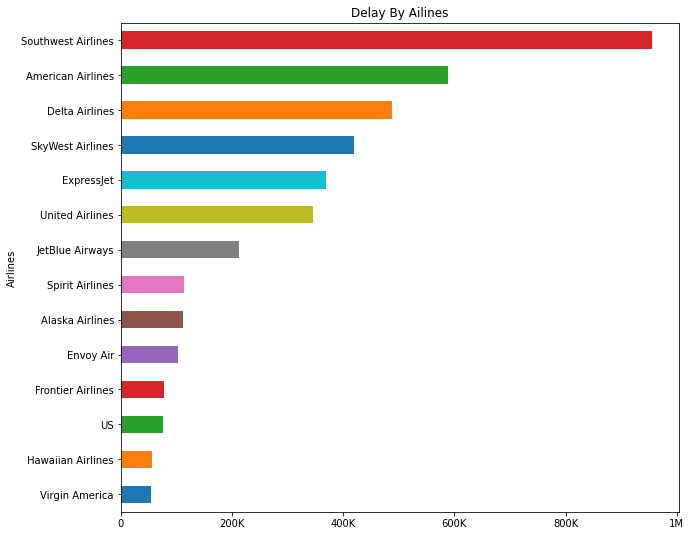

In [ ]:
%%time
df_delay_carrier = df_delay.groupby(['OP_CARRIER'])['ARR_DELAY'].count().sort_values(ascending=True)



df_delay_carrier.plot(kind='barh', title='Delay By Ailines', ylabel='Flight Delays',
         xlabel='Airlines', figsize=(10, 9), color=['C0', 'C1', 'C2', 'C3', 'C4','C5','C6','C7','C8','C9','C10','C11','C12','C13','C14'])
ax = plt.gca()
ax.xaxis.set_major_formatter(tick.FuncFormatter(reformat_large_tick_values));

df_delay_carrier

**Koalas**

In [ ]:
%%time
import plotly.express as px
import random

kdf_delay_carrier = kdf_delay.groupby(['OP_CARRIER'])['ARR_DELAY'].count().sort_values(ascending=True)

fig2 = kdf_delay_carrier.plot.barh()
fig2.update_layout(
    title='Delay by Airlines',
    xaxis_title='Count',
    yaxis_title='Airline',
)

fig2.show()

kdf_delay_carrier

CPU times: user 826 ms, sys: 182 ms, total: 1.01 s
Wall time: 57.5 s


OP_CARRIER
Virgin America         53931
Hawaiian Airlines      55909
US                     76285
Frontier Airlines      76749
Envoy Air             103505
Alaska Airlines       112015
Spirit Airlines       112939
JetBlue Airways       212338
United Airlines       346008
ExpressJet            369745
SkyWest Airlines      419596
Delta Airlines        488367
American Airlines     588136
Southwest Airlines    956158
Name: ARR_DELAY, dtype: int64

**Modin**

CPU times: user 146 ms, sys: 30.7 ms, total: 177 ms
Wall time: 2.83 s


OP_CARRIER
Virgin America         53931
Hawaiian Airlines      55909
US                     76285
Frontier Airlines      76749
Envoy Air             103505
Alaska Airlines       112015
Spirit Airlines       112939
JetBlue Airways       212338
United Airlines       346008
ExpressJet            369745
SkyWest Airlines      419596
Delta Airlines        488367
American Airlines     588136
Southwest Airlines    956158
Name: ARR_DELAY, dtype: int64

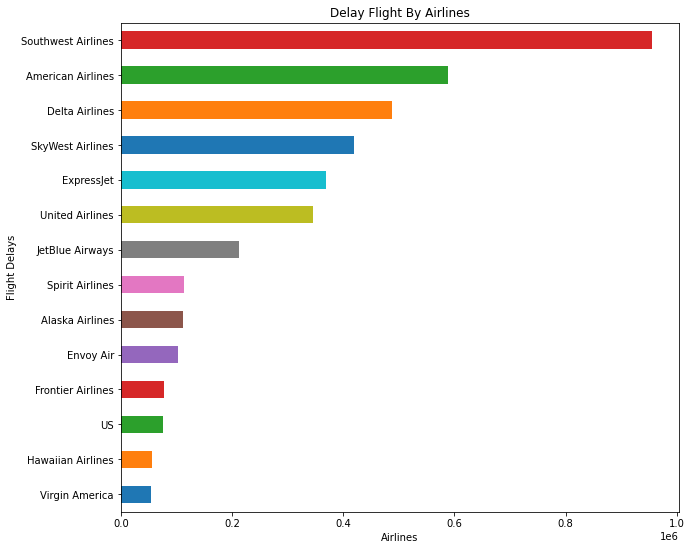

In [ ]:
%%time
md_delay_carrier = md_delay.groupby(['OP_CARRIER'])['ARR_DELAY'].count().sort_values(ascending=True)



md_delay_carrier.plot(kind='barh', title='Delay Flight By Airlines', ylabel='Flight Delays',
         xlabel='Airlines', figsize=(10, 9), color=['C0', 'C1', 'C2', 'C3', 'C4','C5','C6','C7','C8','C9','C10','C11','C12','C13','C14'])

md_delay_carrier

Pandas had a wall time of 345ms, koalas had a time of 57.5s, and modin had a time of 2.83s. Based on this, modin has the least wall time, pandas have the most, and koalas are in the middle.

### **Graph 3: Bar Graph of Average Flight Distance by Airlines**

The bar graph depicts the average flight distance by airline. The graph shows which airlines have the longest flight distance. Virgin America has the longest flight distance at 1423.51 miles, followed by United Airlines at 1246.81 miles and Alaska Airlines at 1212.92 miles. Envoy Air has the shortest flight distance.

**Pandas**

CPU times: user 858 ms, sys: 1.69 ms, total: 860 ms
Wall time: 854 ms


OP_CARRIER
Virgin America        1423.505525
United Airlines       1246.810537
Alaska Airlines       1212.924453
JetBlue Airways       1065.257669
American Airlines     1028.827510
Frontier Airlines     1005.696458
Spirit Airlines        982.529485
US                     915.380259
Delta Airlines         851.753105
Southwest Airlines     746.213229
Hawaiian Airlines      635.873791
SkyWest Airlines       498.301643
ExpressJet             451.950055
Envoy Air              422.661417
Name: DISTANCE, dtype: float64

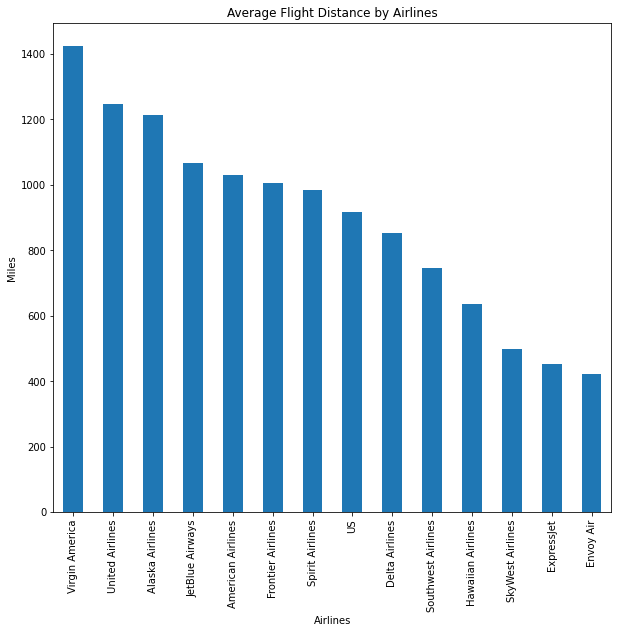

In [ ]:
%%time

df_distance = df.groupby(['OP_CARRIER'])['DISTANCE'].mean().sort_values(ascending=False)

df_distance.plot(kind='bar', title='Average Flight Distance by Airlines', ylabel='Miles',
         xlabel='Airlines', figsize=(10, 9))

df_distance

**Koalas**

In [ ]:
%%time

kdf_distance = kdf.groupby(['OP_CARRIER'])['DISTANCE'].mean().sort_values(ascending=False)


#kdf_distance.plot(kind='bar', title='Average Flight Distance by Airlines', ylabel='Miles',
#         xlabel='Airlines', figsize=(10, 9))

fig3 = kdf_distance.plot.bar()
fig3.update_layout(
    title='Average Flight Distance by Airlines',
    xaxis_title='Airlines',
    yaxis_title='Miles',
)

fig3.show()

kdf_distance

CPU times: user 493 ms, sys: 47.6 ms, total: 541 ms
Wall time: 54.7 s


OP_CARRIER
Virgin America        1423.505525
United Airlines       1246.810537
Alaska Airlines       1212.924453
JetBlue Airways       1065.257669
American Airlines     1028.827510
Frontier Airlines     1005.696458
Spirit Airlines        982.529485
US                     915.380259
Delta Airlines         851.753105
Southwest Airlines     746.213229
Hawaiian Airlines      635.873791
SkyWest Airlines       498.301643
ExpressJet             451.950055
Envoy Air              422.661417
Name: DISTANCE, dtype: float64

**Modin**

CPU times: user 201 ms, sys: 45.4 ms, total: 247 ms
Wall time: 5.66 s


OP_CARRIER
Virgin America        1423.505525
United Airlines       1246.810537
Alaska Airlines       1212.924453
JetBlue Airways       1065.257669
American Airlines     1028.827510
Frontier Airlines     1005.696458
Spirit Airlines        982.529485
US                     915.380259
Delta Airlines         851.753105
Southwest Airlines     746.213229
Hawaiian Airlines      635.873791
SkyWest Airlines       498.301643
ExpressJet             451.950055
Envoy Air              422.661417
Name: DISTANCE, dtype: float64

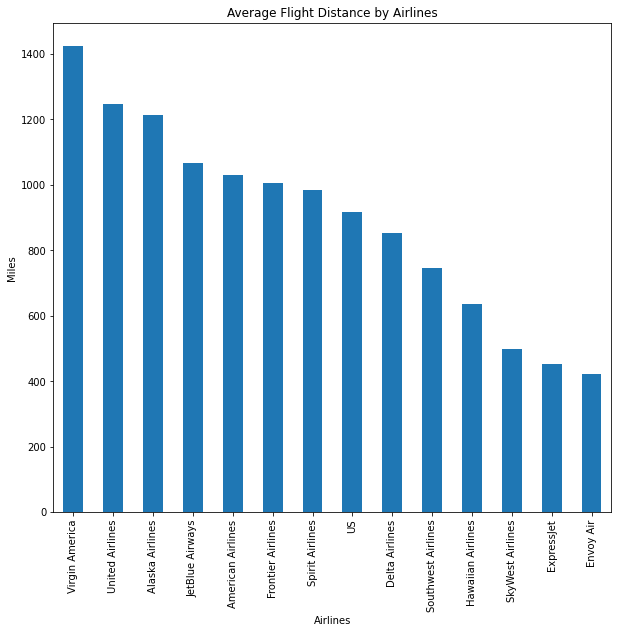

In [ ]:
%%time

md_distance = mdf.groupby(['OP_CARRIER'])['DISTANCE'].mean().sort_values(ascending=False)


md_distance.plot(kind='bar', title='Average Flight Distance by Airlines', ylabel='Miles',
         xlabel='Airlines', figsize=(10, 9))


md_distance

The wall time for pandas was 854ms, the time for koalas was 54.7s, and the time for modin was 5.66s. Modin has the least wall time, pandas have the most, and koalas fall between the two libraries.

### **Graph 4: Pie Chart of Top 5 Airlines with most flight numbers**

The pie chart shows the top five airlines in terms of flight numbers. Southwest Airlines has the highest percentage (31%) on the pie chart, followed by Delta Airlines (21.9%), American Airlines (19.8%), SkyWest Airlines (14.4%), and United Airlines (12.8%).

CPU times: user 857 ms, sys: 2.53 ms, total: 860 ms
Wall time: 852 ms


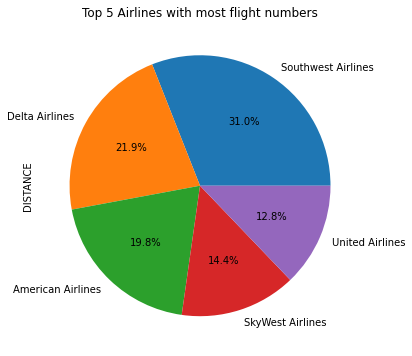

In [ ]:
%%time
import matplotlib.pyplot as plt


# Set the width and height of the figure
plt.figure(figsize=(10,6))

# Add title
plt.title("Top 5 Airlines with most flight numbers")



# Bar chart showing the total number of tweets grouping with candidate
df_source = df.groupby(['OP_CARRIER'])['DISTANCE'].count().sort_values(ascending=False).head(5)

#Table Settings
df_source.plot(kind='pie', autopct='%1.1f%%')

**Koalas**

In [ ]:
%%time
import matplotlib.pyplot as plt

kdf_source = kdf.groupby(['OP_CARRIER'])['DISTANCE'].count().sort_values(ascending=False).head(5)


fig4 = kdf_source.plot.pie(labels='OP_CARRIER')
fig4.update_layout(
    title='Top 5 Airlines with most flight numbers',
    width=800, height=500,
    legend=dict(x=-0.9, y=1.0, bgcolor='rgba(255, 255, 255, 0.5)', orientation="v")
)
# hover the cursor on the pie chart to see the values

CPU times: user 500 ms, sys: 61 ms, total: 561 ms
Wall time: 57.2 s


**Modin**

CPU times: user 138 ms, sys: 14.9 ms, total: 153 ms
Wall time: 1.95 s


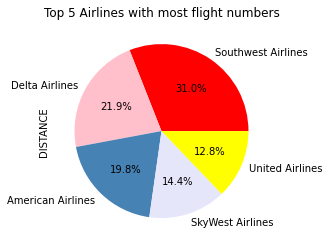

In [ ]:
%%time 

mdf.groupby(['OP_CARRIER'])['DISTANCE'].count().sort_values(ascending=False).head(5).plot(kind='pie', y='Distance', autopct='%1.1f%%',
                                                                                          colors = ['red', 'pink', 'steelblue','lavender','yellow'],
                                                                                          title='Top 5 Airlines with most flight numbers')

Pandas had a wall time of 852ms, koalas had a time of 57.2s, and modin had a time of 1.95s. Based on this, modin has the least wall time, pandas have the most, and koalas are in between modin and pandas.

# **Asking and Answering Questions**


> - Ask at least 5 interesting questions about your dataset
> - Answer the questions either by computing the results using Numpy/Pandas or by plotting graphs using Matplotlib/Seaborn
> - Create new columns, merge multiple dataset and perform grouping/aggregation wherever necessary
> - Wherever you're using a library function from Pandas/Numpy/Matplotlib etc. explain briefly what it does

### **1. Top 5 Airlines that have the most flight numbers**

The first question is about the top 5 airlines that offers the most flights in 2015 until 2016. The top airline that has the most flights is 'Southwest Airlines' with the count of 2522917 flights.

**Pandas**

CPU times: user 860 ms, sys: 0 ns, total: 860 ms
Wall time: 853 ms


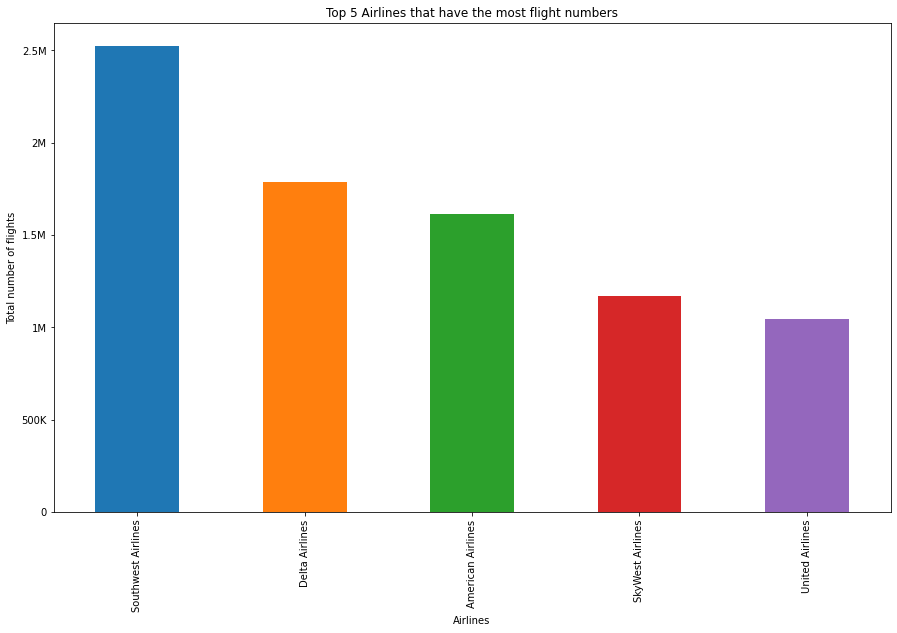

In [ ]:
%%time
df_distance_q5 = df.groupby(['OP_CARRIER'])['DISTANCE'].count().sort_values(ascending=False).head(5)

df_distance_q5 .plot(kind='bar', title='Top 5 Airlines that have the most flight numbers', ylabel='Total number of flights',
         xlabel='Airlines', figsize=(15, 9), color=['C0', 'C1', 'C2', 'C3', 'C4'])
ax = plt.gca()
ax.yaxis.set_major_formatter(tick.FuncFormatter(reformat_large_tick_values));


**Koalas**

In [ ]:
%%time
kdf_top5_flight_number = kdf.groupby(['OP_CARRIER'])['DISTANCE'].count().sort_values(ascending=False).head(5)
kdf_top5_flight_number 

CPU times: user 75.8 ms, sys: 9.39 ms, total: 85.2 ms
Wall time: 574 ms


OP_CARRIER
Southwest Airlines    2522917
Delta Airlines        1787171
American Airlines     1614347
SkyWest Airlines      1172392
United Airlines       1045952
Name: DISTANCE, dtype: int64

In [ ]:
%%time
kdf_top5_flight_number = kdf.groupby(['OP_CARRIER'])['DISTANCE'].count().sort_values(ascending=False).head(5)

colors = ['b', 'g', 'r', 'c', 'm']
fig3 = kdf_top5_flight_number.plot.bar(color=colors)
fig3.update_layout(
    title='Top 5 Airlines that have the most flight numbers',
    xaxis_title='Airlines',
    yaxis_title='Total number of flights',
)

fig3.show()


CPU times: user 598 ms, sys: 58.8 ms, total: 656 ms
Wall time: 54 s


**Modin**

In [ ]:
%%time
md_top5_flight_number = mdf.groupby(['OP_CARRIER'])['DISTANCE'].count().sort_values(ascending=False).head(5)
md_top5_flight_number 

CPU times: user 106 ms, sys: 29.9 ms, total: 136 ms
Wall time: 3.63 s


OP_CARRIER
Southwest Airlines    2522917
Delta Airlines        1787171
American Airlines     1614347
SkyWest Airlines      1172392
United Airlines       1045952
Name: DISTANCE, dtype: int64

CPU times: user 134 ms, sys: 19.8 ms, total: 154 ms
Wall time: 2.66 s


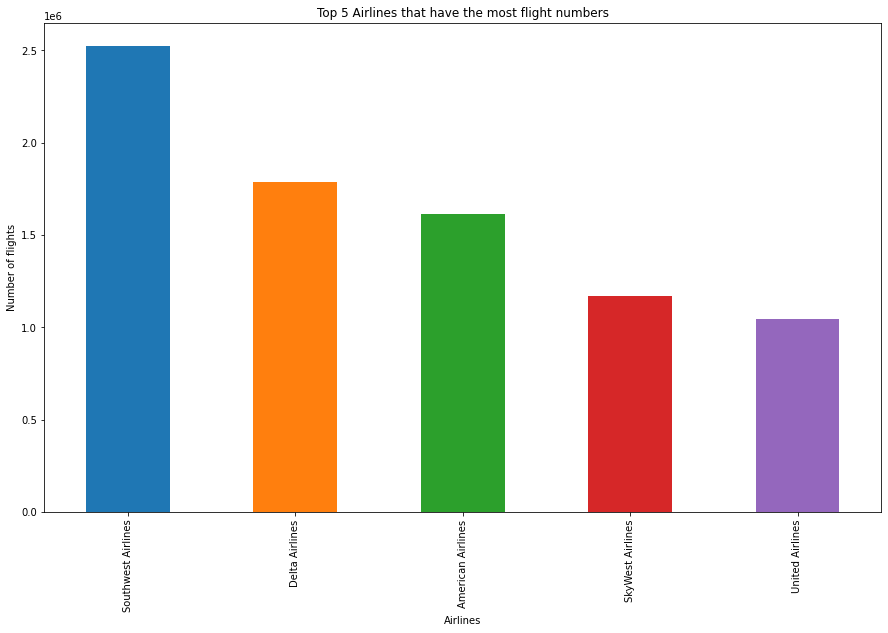

In [ ]:
%%time
mdf_distance_q5 = mdf.groupby(['OP_CARRIER'])['DISTANCE'].count().sort_values(ascending=False).head(5)

mdf_distance_q5 .plot(kind='bar', title='Top 5 Airlines that have the most flight numbers', ylabel='Number of flights',
         xlabel='Airlines', figsize=(15, 9), color=['C0', 'C1', 'C2', 'C3', 'C4'])
ax = plt.gca()

So based on the codes above, for all libraries, we had use the 'groupby' method of the attribute 'OP_CARRIER' and 'DISTANCE'. The recorded time of wall time for pandas is 808ms, while koalas recorded 574ms and modin recorded 3.63s. This means that koalas has the least wall time, modin has the most wall time and pandas is in the middle of both of it.

### **2. Top 10 days with the most number of delay flights.**

The second question is about the top 10 day in 2015 until 2016 that recorded the most delay flights. The highest rate of delayed flights was on 4th January 2015.

**Pandas**

In [ ]:
%%time
df_delay = df[df.ARR_DELAY>0]
df_time = df_delay


def get_day(timestamp):
    day = timestamp.split(' ')[0]
    return day

df_time['day'] = df_time['FL_DATE'].apply(get_day)
time_df = df_time.groupby(['day'])['ARR_DELAY'].count()

time_df.nlargest(10)

<timed exec>:9: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



CPU times: user 1.95 s, sys: 9.43 ms, total: 1.96 s
Wall time: 2.04 s


day
2015-01-04    11107
2015-12-30    10047
2015-01-03    10002
2016-12-18     9854
2015-12-23     9519
2015-06-18     9300
2016-12-17     9165
2015-12-29     9148
2015-02-26     9121
2015-01-05     9080
Name: ARR_DELAY, dtype: int64

**Koalas**

In [ ]:
%%time
kdf_delay = kdf[kdf.ARR_DELAY>0]
kdf_time = kdf_delay

def get_day(date):
  return date.date()

kdf_time['day'] = kdf_time['FL_DATE'].apply(get_day)
time_kdf = kdf_time.groupby(['day'])['ARR_DELAY'].count()

time_kdf.nlargest(10)

/usr/local/lib/python3.8/dist-packages/pyspark/sql/pandas/functions.py:394: UserWarning: In Python 3.6+ and Spark 3.0+, it is preferred to specify type hints for pandas UDF instead of specifying pandas UDF type which will be deprecated in the future releases. See SPARK-28264 for more details.
  warnings.warn(


CPU times: user 769 ms, sys: 101 ms, total: 870 ms
Wall time: 1min 33s


day
2015-01-04    11107
2015-12-30    10047
2015-01-03    10002
2016-12-18     9854
2015-12-23     9519
2015-06-18     9300
2016-12-17     9165
2015-12-29     9148
2015-02-26     9121
2015-01-05     9080
Name: ARR_DELAY, dtype: int64

**Modin**

In [ ]:
%%time
mdf_delay = mdf[mdf.ARR_DELAY>0]
mdf_time = mdf_delay


def get_day(timestamp):
    day = timestamp.split(' ')[0]
    return day

mdf_time['day'] = mdf_time['FL_DATE'].apply(get_day)
time_mdf = mdf_time.groupby(['day'])['ARR_DELAY'].count()

time_mdf.nlargest(10)

CPU times: user 329 ms, sys: 92.3 ms, total: 421 ms
Wall time: 7.68 s


day
2015-01-04    11107
2015-12-30    10047
2015-01-03    10002
2016-12-18     9854
2015-12-23     9519
2015-06-18     9300
2016-12-17     9165
2015-12-29     9148
2015-02-26     9121
2015-01-05     9080
Name: ARR_DELAY, dtype: int64

So based on the codes above, the wall time pandas recorded is 2.04s, while koalas recorded 1min 33s and modin recorded 7.68s. This means that koalas has the most wall time, pandas has the least wall time and modin is in the middle of both of it.

### **3. What is the longest and shortest of flight delay time?**

**Pandas**

In [ ]:
%%time
df_delay = df[df.ARR_DELAY>0]

q3_max = df_delay['ARR_DELAY'].max()
q3_min = df_delay['ARR_DELAY'].min()

print("Longest flight delay time: ",q3_max, ' minutes')
print("Shortest flight delay time: ",q3_min, ' minute')

Longest flight delay time:  2142.0  minutes
Shortest flight delay time:  1.0  minutes
CPU times: user 588 ms, sys: 373 µs, total: 588 ms
Wall time: 591 ms


**Koalas**

In [ ]:
%%time
kdf_delay = kdf[kdf.ARR_DELAY>0]

fl_max = kdf_delay['ARR_DELAY'].max()
fl_min = kdf_delay['ARR_DELAY'].min()

print("Longest flight delay time: ",fl_max, ' minutes')
print("Shortest flight delay time: ",fl_min, ' minute')

Longest flight delay time:  2142.0  minutes
Shortest flight delay time:  1.0  minute
CPU times: user 876 ms, sys: 84.6 ms, total: 961 ms
Wall time: 2min 13s


**Modin**

In [ ]:
%%time
mdf_delay = mdf[mdf.ARR_DELAY>0]

arrd_max = mdf_delay['ARR_DELAY'].max()
arrd_min = mdf_delay['ARR_DELAY'].min()

print("Longest flight delay time: ",arrd_max, ' minutes')
print("Shortest flight delay time: ",arrd_min, ' minute')

Longest flight delay time:  2142.0  minutes
Shortest flight delay time:  1.0  minutes
CPU times: user 263 ms, sys: 79.5 ms, total: 343 ms
Wall time: 7.58 s


The third question is about the longest and the shortest delay time in 2015 until 2016. The longest delay of a flight is 2214 minutes and the shortest delay is 1 minute.

So based on the codes above, the wall time pandas recorded is 591ms, while koalas recorded 2min 13s and modin recorded 7.58s. This means that koalas has the most wall time, pandas has the least wall time and modin is in the middle of both of it.

### **4. What is the percentage of delay flight for each airlines?**

**Pandas**

In [ ]:
%%time
df_delay_percentage = ((df_delay.groupby(['OP_CARRIER'])['DISTANCE'].count()))/(df.groupby(['OP_CARRIER'])['DISTANCE'].count()) * 100

df_delay_percentage.rename('Delay Percentage', inplace = True)

df_delay_percentage.sort_values(ascending=False)

CPU times: user 1.33 s, sys: 5.17 ms, total: 1.34 s
Wall time: 1.42 s


OP_CARRIER
Spirit Airlines       45.073913
Frontier Airlines     41.738180
Virgin America        41.643952
JetBlue Airways       39.317993
US                    39.277017
Southwest Airlines    37.898908
Envoy Air             37.126378
Hawaiian Airlines     36.630893
American Airlines     36.431820
ExpressJet            35.818425
SkyWest Airlines      35.789736
United Airlines       33.080677
Alaska Airlines       32.238986
Delta Airlines        27.326260
Name: Delay Percentage, dtype: float64

**Koalas**

In [ ]:
ks.set_option('compute.ops_on_diff_frames', True)

In [ ]:
%%time
kdf_delay_percentage = ((kdf_delay.groupby(['OP_CARRIER'])['DISTANCE'].count()))/(kdf.groupby(['OP_CARRIER'])['DISTANCE'].count()) * 100

kdf_delay_percentage.rename('Delay Percentage', inplace = True)

kdf_delay_percentage.sort_values(ascending=False)


CPU times: user 243 ms, sys: 34.3 ms, total: 277 ms
Wall time: 1.86 s


OP_CARRIER
Spirit Airlines       45.073913
Frontier Airlines     41.738180
Virgin America        41.643952
JetBlue Airways       39.317993
US                    39.277017
Southwest Airlines    37.898908
Envoy Air             37.126378
Hawaiian Airlines     36.630893
American Airlines     36.431820
ExpressJet            35.818425
SkyWest Airlines      35.789736
United Airlines       33.080677
Alaska Airlines       32.238986
Delta Airlines        27.326260
Name: Delay Percentage, dtype: float64

**Modin**

In [ ]:
%%time
mdf_delay_percentage = ((mdf_delay.groupby(['OP_CARRIER'])['DISTANCE'].count()))/(mdf.groupby(['OP_CARRIER'])['DISTANCE'].count()) * 100

mdf_delay_percentage.rename('Delay Percentage', inplace = True)

mdf_delay_percentage.sort_values(ascending=False)

CPU times: user 182 ms, sys: 57.2 ms, total: 239 ms
Wall time: 6.06 s


OP_CARRIER
Spirit Airlines       45.073913
Frontier Airlines     41.738180
Virgin America        41.643952
JetBlue Airways       39.317993
US                    39.277017
Southwest Airlines    37.898908
Envoy Air             37.126378
Hawaiian Airlines     36.630893
American Airlines     36.431820
ExpressJet            35.818425
SkyWest Airlines      35.789736
United Airlines       33.080677
Alaska Airlines       32.238986
Delta Airlines        27.326260
Name: Delay Percentage, dtype: float64

The question is about the percentage of the flight delay of each airline. So, from here, we can see each of the airline percentages which recorded that 'Spirit Airlines' has the highest percentage of delayed flights. 

Based on the above, the wall time of pandas has been recorded about 1.42s, koalas 1.38s and modin 6.06s. This means that koalas has the least wall time, while modin has the most and pandas is in the middle. 

### **5. What is the average flight distance for each airlines?**

**Pandas**

In [ ]:
%%time
df_distance_q5 = df.groupby(['OP_CARRIER'])['DISTANCE'].mean().sort_values(ascending=False)
df_distance_q5

CPU times: user 862 ms, sys: 3.74 ms, total: 866 ms
Wall time: 862 ms


OP_CARRIER
Virgin America        1423.505525
United Airlines       1246.810537
Alaska Airlines       1212.924453
JetBlue Airways       1065.257669
American Airlines     1028.827510
Frontier Airlines     1005.696458
Spirit Airlines        982.529485
US                     915.380259
Delta Airlines         851.753105
Southwest Airlines     746.213229
Hawaiian Airlines      635.873791
SkyWest Airlines       498.301643
ExpressJet             451.950055
Envoy Air              422.661417
Name: DISTANCE, dtype: float64

**Koalas**

In [ ]:
%%time
kdf_distance_q5 = kdf.groupby(['OP_CARRIER'])['DISTANCE'].mean().sort_values(ascending=False)
kdf_distance_q5

CPU times: user 35.9 ms, sys: 5.64 ms, total: 41.6 ms
Wall time: 213 ms


OP_CARRIER
Virgin America        1423.505525
United Airlines       1246.810537
Alaska Airlines       1212.924453
JetBlue Airways       1065.257669
American Airlines     1028.827510
Frontier Airlines     1005.696458
Spirit Airlines        982.529485
US                     915.380259
Delta Airlines         851.753105
Southwest Airlines     746.213229
Hawaiian Airlines      635.873791
SkyWest Airlines       498.301643
ExpressJet             451.950055
Envoy Air              422.661417
Name: DISTANCE, dtype: float64

**Modin**

In [ ]:
%%time
mdf_distance = mdf.groupby(['OP_CARRIER'])['DISTANCE'].mean().sort_values(ascending=False)
mdf_distance

(raylet) Spilled 16433 MiB, 352 objects, write throughput 234 MiB/s.


CPU times: user 152 ms, sys: 36.6 ms, total: 189 ms
Wall time: 4.8 s


OP_CARRIER
Virgin America        1423.505525
United Airlines       1246.810537
Alaska Airlines       1212.924453
JetBlue Airways       1065.257669
American Airlines     1028.827510
Frontier Airlines     1005.696458
Spirit Airlines        982.529485
US                     915.380259
Delta Airlines         851.753105
Southwest Airlines     746.213229
Hawaiian Airlines      635.873791
SkyWest Airlines       498.301643
ExpressJet             451.950055
Envoy Air              422.661417
Name: DISTANCE, dtype: float64

This question is to find the average distance of each airline has travelled during 2015-2016. From the above results, it can be seen that 'Virgin America' has the highest average if travelled distance and 'Envoy Air' has the least.

The wall time recorded by pandas was 862ms, koalas was 213ms and modin was 4.8s. Based on this, koalas has the least wall time, modin has the most wall time and pandas is in the middle of them.

## **Inferences and Conclusion** 

In conclusion, the performance of Pandas, Koalas, and Modin was compared in terms of executing various data cleaning and manipulation operations on a DataFrame. The operations included replacing abbreviated airline codes with their full names in the 'OP_CARRIER' column, removing all rows with missing values ('NaN'), calculating the sum of missing values for each column, and dropping several columns from the DataFrame.

From the results, it can be seen that each library has its strengths and weaknesses in terms of performance. Modin was the fastest in executing the 'drop' operation, with the shortest CPU time (3.87 ms) and wall time (8.19 ms). Koalas was the fastest in executing the 'replace' operation, with the shortest CPU time (65.3 ms) and wall time (416 ms). On the other hand, Pandas was the slowest in executing the 'replace' and 'drop' operations, but had a relatively short wall time in the 'remove missing values' operation.

In terms of reading the CSV file 'airline1516.csv' into a DataFrame, Koalas had the shortest CPU time (537 ms) compared to Modin (2.18 s) and Pandas (40.4 s). However, Pandas had a relatively short wall time compared to Koalas (1min 23s) and Modin (1min 12s).

The performance of Pandas, Koalas, and Modin varies depending on the operation being executed and the size of the data. For small datasets, Koalas may perform faster, while for larger datasets, Modin may be a better option. It is important to consider the specific requirements and nature of a project before choosing a library for data cleaning and manipulation operations.

##### **Summary of questions**
In 2015-2016, the top 5 airlines with the most flights were analyzed and it was found that Southwest Airlines had the highest number of flights with 2522917. Further, the top 10 days with the most delayed flights were analyzed, and January 4th, 2015 had the highest rate of delays. Additionally, the longest and shortest delay times were analyzed, with the longest being 2214 minutes and the shortest being 1 minute. A analysis of the percentage of delayed flights for each airline showed that Spirit Airlines had the highest percentage of delayed flights. Finally, the average distance traveled by each airline during 2015-2016 was analyzed, and it was found that Virgin America had the highest average distance traveled, while Envoy Air had the least.

## **References and Future Work**


[Charts in Colaboratory Notebook](https://colab.research.google.com/notebooks/charts.ipynb
)

[Pandas](https://pandas.pydata.org/docs/
)

[Koalas](https://koalas.readthedocs.io/en/latest/
)

[Modin](https://modin.readthedocs.io/en/latest/
)

Future Work:
1. Incorporating additional data sources, such as weather patterns and air traffic control information, to better understand the factors that contribute to flight delays.

2. Conducting a survey of travelers to better understand their experiences with flight delays and use this data to inform the development of new strategies for mitigating delays.

3. Creating an interactive visualization tool to allow users to explore the data and gain insights into flight delay patterns and causes.

4. Creating a prediction model to better forecast delays and minimize the impact of delays on travelers.